# Prediction using Supervised ML
<img src="supervisedml.png" width="700px">

### Importing Important Libraries

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Importing Dataset

In [2]:
df = pd.read_csv("student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualizing Dataset

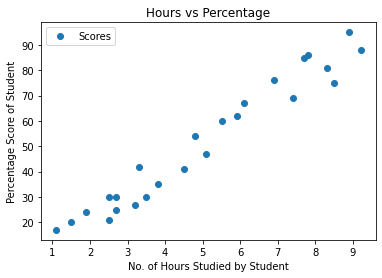

In [3]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied by Student')  
plt.ylabel('Percentage Score of Student')  
plt.show()

### Modeling Dataset

In [4]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

### Ploting Model

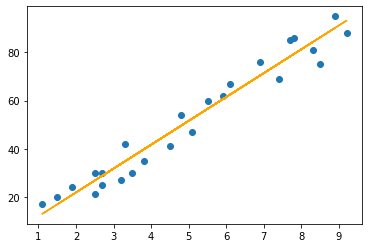

In [5]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line,color='orange');
plt.show()

### Model Prediction

In [6]:
y_pred = regressor.predict(X_test)
df_test = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred}) 
df_test

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### As we can see the predicted values are approximately equal to the actual values.

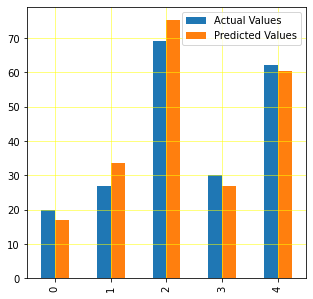

In [8]:
df_test.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='yellow')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

### Regression Score

In [9]:
print("Training Regression Score:",regressor.score(X_train,y_train))
print("Test Regression Score:",regressor.score(X_test,y_test))

Training Regression Score: 0.9515510725211552
Test Regression Score: 0.9454906892105354


### TESTING MODEL
#### What will be the predicted score if the student studies for 9.25 hrs/day?

In [10]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No. of Hours Studied by Student = {}".format(hours))
print("Predicted Score of Student = {}".format(own_pred[0]))

No. of Hours Studied by Student = 9.25
Predicted Score of Student = 93.69173248737539


### Model Evaluation

In [16]:
from sklearn import metrics  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Root Mean Squared Error: 4.647447612100373
Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


### Evaluate model fitting

In [18]:
print('R-2 Score:', metrics.r2_score(y_test, y_pred))

R-2 Score: 0.9454906892105354


#### The R-2 Score is 94% & RMSE is 4.65. As the model has higher R-2 score & lower RMSE, it can predict with more accuracy.